<a href="https://colab.research.google.com/github/krahul2024/machine-learning/blob/main/projects/mnist-digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Defining a function for dataset preparation and handling
def load_dataset():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # load the dataset
    x_train, x_test = x_train.reshape((x_train.shape[0], 28, 28, 1)), x_test.reshape((x_test.shape[0], 28, 28, 1))
    # one hot encoding of the labels
    y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)
    return x_train, y_train, x_test, y_test


# preparing the pixel data or normalization as the pixel data lies between 0-255
def prepare_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    return train_norm/255.0, test_norm/255.0

In [4]:
# define the model
def get_model():
    # define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(
            filters = 32, kernel_size = (3,3),
            activation = 'relu',  input_shape = (28, 28, 1)
        ),
        tf.keras.layers.MaxPooling2D((2,2)),
         tf.keras.layers.Conv2D(
            filters = 48, kernel_size = (3,3),  activation = 'relu',
        ),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(
            120, activation = 'relu',
        ),
        tf.keras.layers.Dense(
            80, activation = 'relu',
        ),
        tf.keras.layers.Dense(
            40, activation='relu'
        ),
         tf.keras.layers.Dense(
            10, activation='softmax'
        ),
    ])

    # compile the model
    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001,),
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
    )

    return model


In [ ]:
# Load the dataset
x_train, y_train, x_test, y_test = load_dataset()

# prepare the dataset
x_train, x_test = prepare_pixels(x_train, x_test)

# Train the model
model = get_model()
history = model.fit(
    x_train, y_train, batch_size=32, epochs = 20, validation_data = (x_test, y_test)
)

1/1 [==============================] - 0s 28ms/step


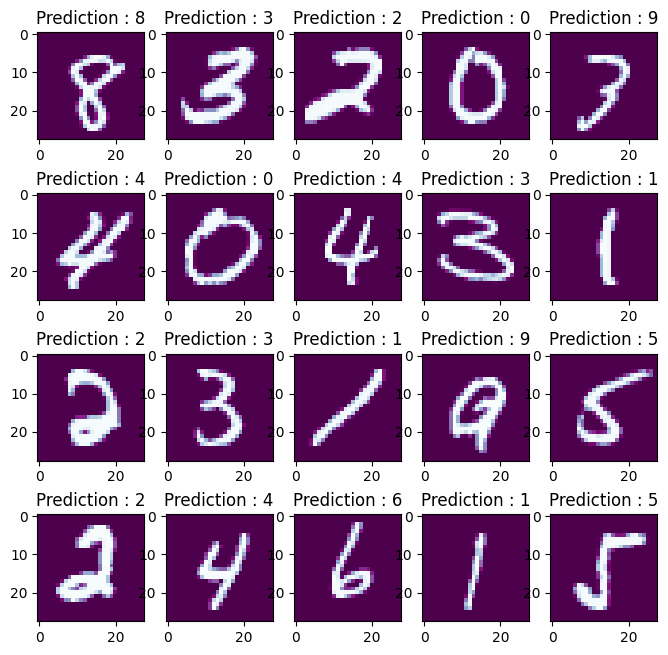

In [22]:
# # plot the images
indexes = np.random.randint(0, x_test.shape[0], size = 20)
predictions = model.predict(x_test[indexes])

results = []

for pred in predictions :
    preds = np.array(pred)
    label = np.argmax(preds)
    results.append(label)

plt.figure(figsize=(8, 8))
for i in range( len(indexes)) :
    plt.subplot(4, 5, i+1)
    plt.imshow(x_test[indexes[i]], cmap = plt.get_cmap('BuPu_r'))
    plt.title(f"Prediction : {results[i]}")
plt.show()

In [24]:
# saving the model
model.save('mnist_one.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
